In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'C:/Users/Timona L/Desktop/Portfolios/Datasets/WalmartSalesData.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

C:\Users\Timona L\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [3]:
df.shape

(1000, 17)

# Data Cleaning and Preprocessing

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the missing values for each column
missing_values

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

Results:

There is No missing values in the dataset

# Handling outliers

In [5]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'cogs',
       'gross_margin_percentage', 'gross_income', 'rating'],
      dtype='object')

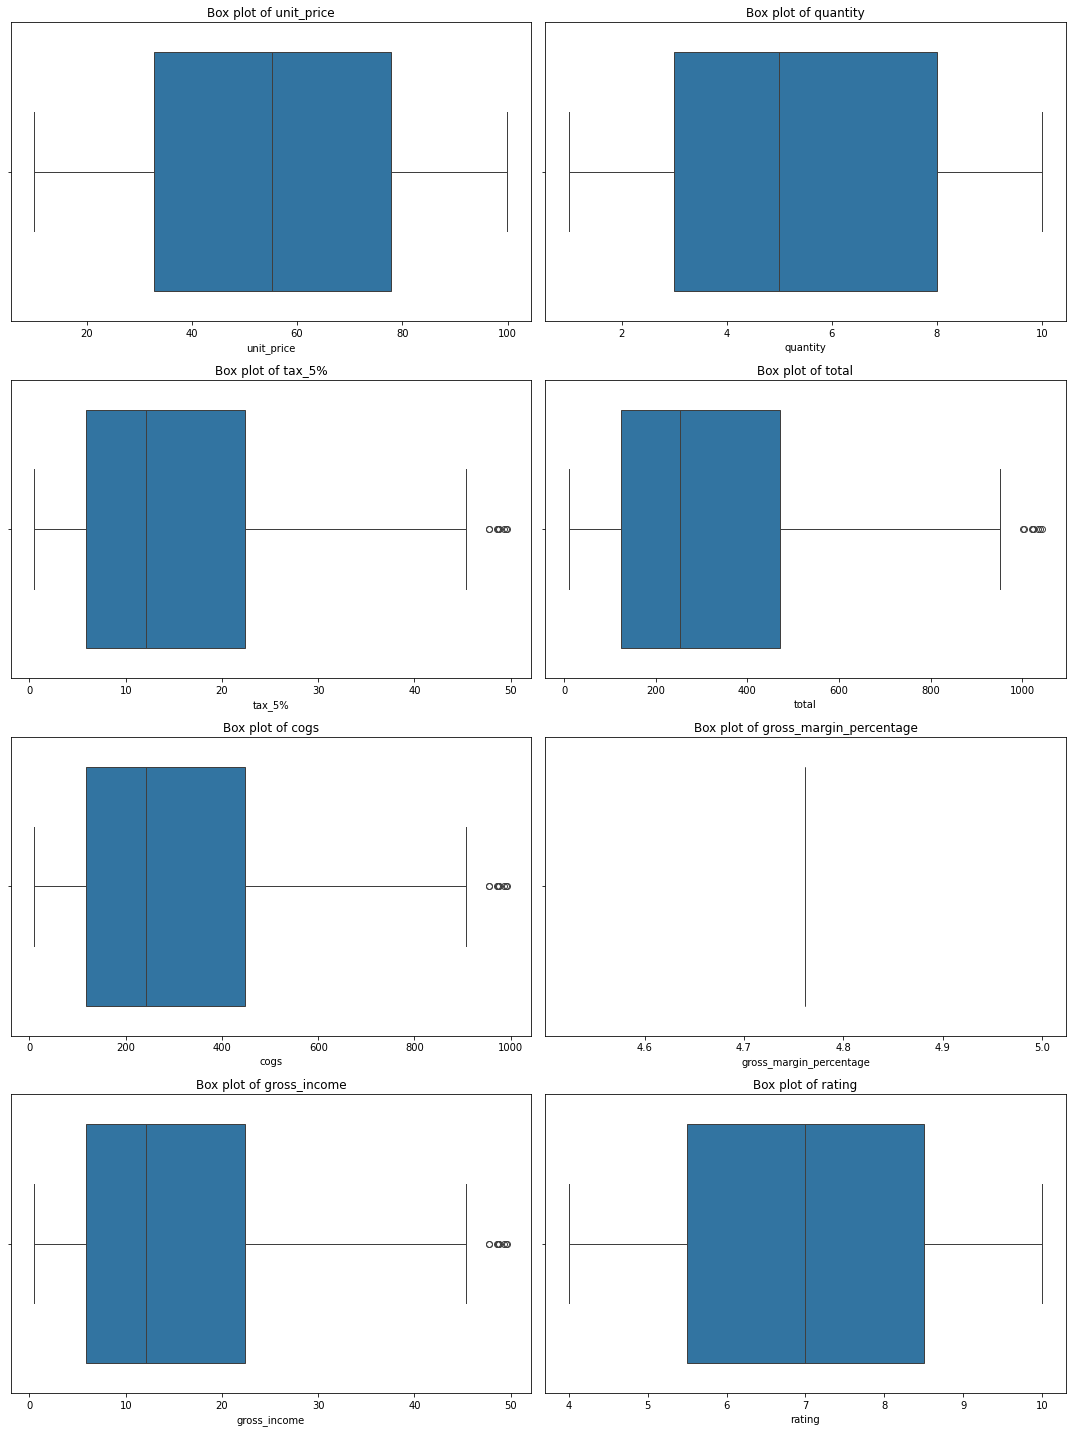

In [6]:
# Define the number of columns for the subplots
num_columns = 2
num_rows = len(numeric_columns) // num_columns + (len(numeric_columns) % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the box plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Results:

There are some visible outliers in columns like tax_5%, total, cogs, and gross_income.

# Remove Outliers Using IQR Method

In [7]:
# List of columns with visible outliers
columns_with_outliers = ['tax_5%', 'total', 'cogs', 'gross_income']

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each column with outliers
for column in columns_with_outliers:
    df = remove_outliers(df, column)

# Display the shape of the dataframe after removing outliers
df.shape

(991, 17)

Results:

Outliers are successfully removed and reduced the number of rows by 9

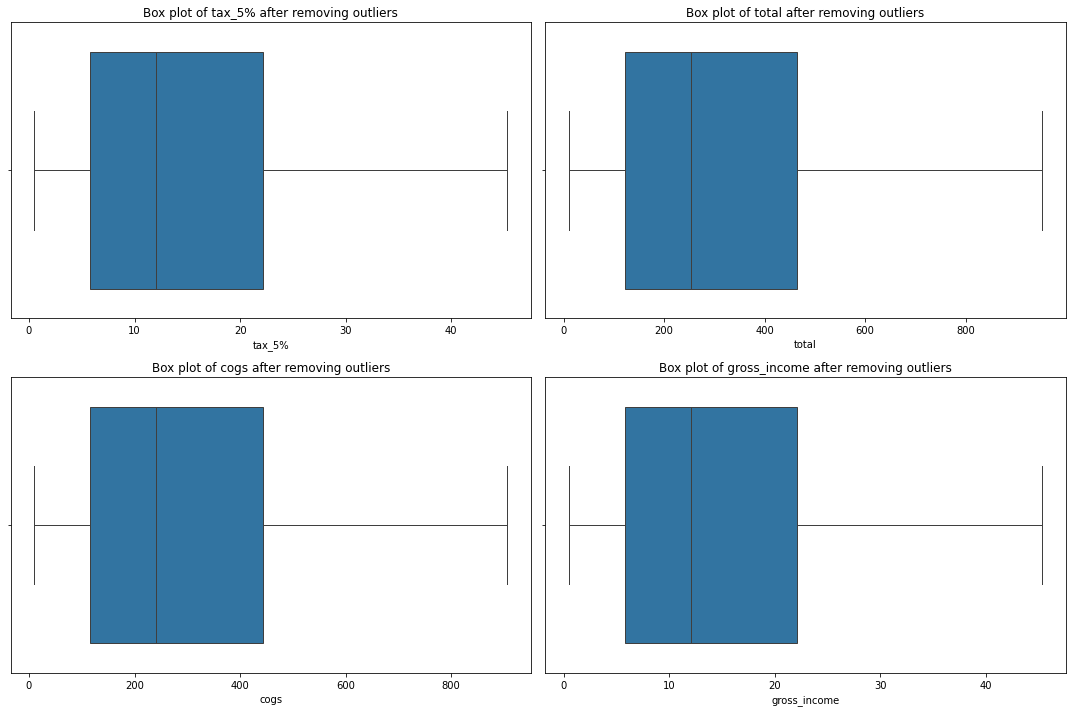

In [8]:
# Define the number of columns for the subplots
num_columns = 2
num_rows = len(columns_with_outliers) // num_columns + (len(columns_with_outliers) % num_columns > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column} after removing outliers')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Check for duplicate and blanks

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
duplicate_rows

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating


In [10]:
# Check for blank columns (columns with all NaN values)
blank_columns = df.columns[df.isna().all()].tolist()

# Check for blank rows (rows with all NaN values)
blank_rows = df[df.isna().all(axis=1)]

# Display the blank columns and rows
blank_columns, blank_rows

([],
 Empty DataFrame
 Columns: [invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_5%, total, date, time, payment, cogs, gross_margin_percentage, gross_income, rating]
 Index: [])

Results:

No duplicate rows, no blank columns and rows

# Identify and Convert Date Columns

In [11]:
# Display the first few rows of 'date' and 'time' columns to identify their format
df[['date', 'time']].head()

,date,time
0,1/5/2019,13:08:00
1,3/8/2019,10:29:00
2,3/3/2019,13:23:00
3,1/27/2019,20:33:00
4,2/8/2019,10:37:00


In [12]:
# Convert 'date' column to datetime with specified format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')

# Extract only the time part from the 'time' column
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time

In [13]:
# Display data types to confirm the conversion
df.dtypes

invoice_id                         object
branch                             object
city                               object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax_5%                            float64
total                             float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
dtype: object

# Extracting Additional Features

In [14]:
# Extract additional features from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()

# Display the first few rows to check the extracted features
df[['date', 'time', 'year', 'month', 'day', 'day_of_week', 'day_name']].head()

,date,time,year,month,day,day_of_week,day_name
0,2019-01-05,13:08:00,2019,1,5,5,Saturday
1,2019-03-08,10:29:00,2019,3,8,4,Friday
2,2019-03-03,13:23:00,2019,3,3,6,Sunday
3,2019-01-27,20:33:00,2019,1,27,6,Sunday
4,2019-02-08,10:37:00,2019,2,8,4,Friday


In [15]:
# Display the first few rows of the dataframe
df.head(3)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,payment,cogs,gross_margin_percentage,gross_income,rating,year,month,day,day_of_week,day_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,5,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,4,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,6,Sunday


Results:

The date column is now correctly recognized as a datetime64 type, and the time column remains as an object.

The additional features (year, month, day, day_of_week, and day_name) have been successfully extracted from the date column.

The dataset is now properly preprocessed and ready for further analysis.

# Create date column

In [16]:
# Create 'date' column from 'year', 'month', 'day'
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               991 non-null    object        
 1   branch                   991 non-null    object        
 2   city                     991 non-null    object        
 3   customer_type            991 non-null    object        
 4   gender                   991 non-null    object        
 5   product_line             991 non-null    object        
 6   unit_price               991 non-null    float64       
 7   quantity                 991 non-null    int64         
 8   tax_5%                   991 non-null    float64       
 9   total                    991 non-null    float64       
 10  date                     991 non-null    datetime64[ns]
 11  time                     991 non-null    object        
 12  payment                  991 non-null    

In [17]:
# Display the properties of the date column
print("\nProperties of the 'date' column:")
df['date'].info()


Properties of the 'date' column:
<class 'pandas.core.series.Series'>
Index: 991 entries, 0 to 999
Series name: date
Non-Null Count  Dtype         
--------------  -----         
991 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.5 KB


In [18]:
# Print the first few rows of the date column
print("First few rows of the 'date' column:")
df['date'].head()

First few rows of the 'date' column:


0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: date, dtype: datetime64[ns]

# Cleaned data saved to a CSV file for further analysis in SQL

In [19]:
# Save the cleaned data to a CSV file for further analysis in SQL
cleaned_file_path = 'C:/Users/Timona L/Desktop/Portfolios/Datasets/WalmartSalesData_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)